# **Using Numpy for linear algebra and basic data analysis.**

This notebook is meant as a companion to the notebook, "M1E_Eigen_Values_Vectors_Decompositions_and_Transformations".  In it we will load some data to create a Numpy array, and then we will use some linear algebra calculations to analyze some basic statistics for that data.

## **Installing and importing necessary packages.**

Before we can do anything in this notebook, we need to make sure that we have the appropriate packages installed into our python environment.

There are two ways to accomplish this:

1) If we want to permanently add it to our environment (e.g., if it is something we will use many times), then we can use the **terminal** and run one of the commands (the choice of which command to use depends on how the developer wrote their codes):
     * "pip install [package name]" - 'pip' installs python packages only and from source files.
     * "conda install [package name]"  -- conda installs packages directly from binary files.  It can install many different types of functions (e.g., python, c++, java.).  Because it uses binary files, conda may be faster.

2) We can accomplish the same functions within Jupyter by using **shell** commands.  By using the prefix, '!', we can run the following statements in a shell (as if it were a terminal).
    *  "!pip install [package name]" 
    *  "!conda install [package name]"

3) If we wish to istall it temporarilly for just the current session, we can use the magic commands within the notebook:
    * "%pip install [package name]" - the so-called Jupyter magic command '%' at the beginning allows you to call special Jupyter commands.
    * "%conda install [package name]" 



In [1]:
#Install the scikit-learn library using the magic %pip% command
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [2]:
# import the libraries
import numpy as np
import matplotlib.pyplot as plt

# import a bunch of pre-saved dataset from scikit-learn
from sklearn import datasets

# **Example 1 - Using PCA to Explore data sets to find interesting information.**

In [3]:
# Let's look at what is contained in the datasets we just loaded:
dir(datasets)

['__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__getattr__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_arff_parser',
 '_base',
 '_california_housing',
 '_covtype',
 '_kddcup99',
 '_lfw',
 '_olivetti_faces',
 '_openml',
 '_rcv1',
 '_samples_generator',
 '_species_distributions',
 '_svmlight_format_fast',
 '_svmlight_format_io',
 '_twenty_newsgroups',
 'clear_data_home',
 'dump_svmlight_file',
 'fetch_20newsgroups',
 'fetch_20newsgroups_vectorized',
 'fetch_california_housing',
 'fetch_covtype',
 'fetch_kddcup99',
 'fetch_lfw_pairs',
 'fetch_lfw_people',
 'fetch_olivetti_faces',
 'fetch_openml',
 'fetch_rcv1',
 'fetch_species_distributions',
 'get_data_home',
 'load_breast_cancer',
 'load_diabetes',
 'load_digits',
 'load_files',
 'load_iris',
 'load_linnerud',
 'load_sample_image',
 'load_sample_images',
 'load_svmlight_file',
 'load_svmlight_files',
 'load_wine',
 'make_biclusters',
 'make_blobs',
 'make_checkerboard',
 'make_circl

In [4]:
# Now, let's load the specific data set for iris flowers
iris = datasets.load_iris()

# Let's also get some information about that dataset
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

### Some images of Irises.
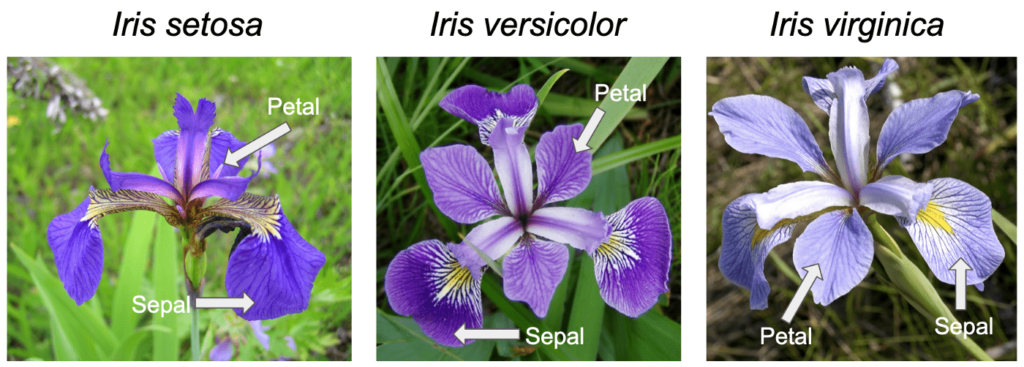

Image adapted from "https://www.analyticsvidhya.com/blog/2022/06/iris-flowers-classification-using-machine-learning/"

## Extracting data into a numpy array

Now that we found a fun data set to explore, lets get it into a numpy array for subsequent processing.

In [5]:
print(f'The iris variable contains the following methods or data: {dir(iris)}')

# If we want to know what type of data each of these methods or data are, we can use the type() function
# on each attribute of the iris variable
for x in dir(iris):
    print(f'the type of {x} is {type(getattr(iris, x))}')


The iris variable contains the following methods or data: ['DESCR', 'data', 'data_module', 'feature_names', 'filename', 'frame', 'target', 'target_names']
the type of DESCR is <class 'str'>
the type of data is <class 'numpy.ndarray'>
the type of data_module is <class 'str'>
the type of feature_names is <class 'list'>
the type of filename is <class 'str'>
the type of frame is <class 'NoneType'>
the type of target is <class 'numpy.ndarray'>
the type of target_names is <class 'numpy.ndarray'>


In [6]:
# Let's look at the data itself
irisData = iris.data

# Now let's print the different methods and data that are contained in the irisData variable
print(f'The irisData variable contains the following methods or data: {dir(irisData)}')

The irisData variable contains the following methods or data: ['T', '__abs__', '__add__', '__and__', '__array__', '__array_finalize__', '__array_function__', '__array_interface__', '__array_prepare__', '__array_priority__', '__array_struct__', '__array_ufunc__', '__array_wrap__', '__bool__', '__class__', '__class_getitem__', '__complex__', '__contains__', '__copy__', '__deepcopy__', '__delattr__', '__delitem__', '__dir__', '__divmod__', '__dlpack__', '__dlpack_device__', '__doc__', '__eq__', '__float__', '__floordiv__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__iadd__', '__iand__', '__ifloordiv__', '__ilshift__', '__imatmul__', '__imod__', '__imul__', '__index__', '__init__', '__init_subclass__', '__int__', '__invert__', '__ior__', '__ipow__', '__irshift__', '__isub__', '__iter__', '__itruediv__', '__ixor__', '__le__', '__len__', '__lshift__', '__lt__', '__matmul__', '__mod__', '__mul__', '__ne__', '__neg__', '__new__', '__or__', '__pos__', '__

In [7]:
# Wow, that's a lot of stuff! Let's look at the shape of the data
print(f'The shape of the iris data is: {irisData.shape}')

The shape of the iris data is: (150, 4)


In [8]:
# Let's look at the first 5 rows of data
print(f'The first 5 rows of iris data are: {irisData[:5]}')

The first 5 rows of iris data are: [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [9]:
# Let's look at the last 5 rows of data
print(f'The last 5 rows of iris data are: {irisData[-5:]}')

The last 5 rows of iris data are: [[6.7 3.  5.2 2.3]
 [6.3 2.5 5.  1.9]
 [6.5 3.  5.2 2. ]
 [6.2 3.4 5.4 2.3]
 [5.9 3.  5.1 1.8]]


## Performing some basic linear algebra to compute statistics from the data.

In [10]:
# Lets compute the mean of each column using some linear algebra
# Note that in python, matrix multiplication uses the @ symbol.
meanIris = np.ones(irisData.shape[0]) @ irisData / irisData.shape[0]
print(f'The mean of each column is: {meanIris}')

# Lets compute the mean using the built-in numpy function
meanIris = np.mean(irisData, axis=0)
print(f'The mean of each column is: {meanIris}')


The mean of each column is: [5.84333333 3.05733333 3.758      1.19933333]
The mean of each column is: [5.84333333 3.05733333 3.758      1.19933333]


In [11]:
# Let's compute the covariance matrix using some linear algebra
# Note that in python, matrix multiplication uses the @ symbol.
covIris = (irisData - meanIris).T @ (irisData - meanIris) / (irisData.shape[0]-1)
print(f'The covariance matrix using algebra is: {covIris}')

#Let's compute the covariance matrix using the built-in numpy function
covIris = np.cov(irisData.T)
print(f'The covariance matrix using builtin is: {covIris}')

# Hmm.  these are close...
# Based on what you learned in statistics class, can anyone tell me what the difference is between these two covariance matrices?

The covariance matrix using algebra is: [[ 0.68569351 -0.042434    1.27431544  0.51627069]
 [-0.042434    0.18997942 -0.32965638 -0.12163937]
 [ 1.27431544 -0.32965638  3.11627785  1.2956094 ]
 [ 0.51627069 -0.12163937  1.2956094   0.58100626]]
The covariance matrix using builtin is: [[ 0.68569351 -0.042434    1.27431544  0.51627069]
 [-0.042434    0.18997942 -0.32965638 -0.12163937]
 [ 1.27431544 -0.32965638  3.11627785  1.2956094 ]
 [ 0.51627069 -0.12163937  1.2956094   0.58100626]]


Hmm.  these are close...
Based on what you learned in statistics class, can anyone tell me what the difference is between these two covariance matrices and how I can get them to be the same?

## Making some plots to visualize our data.

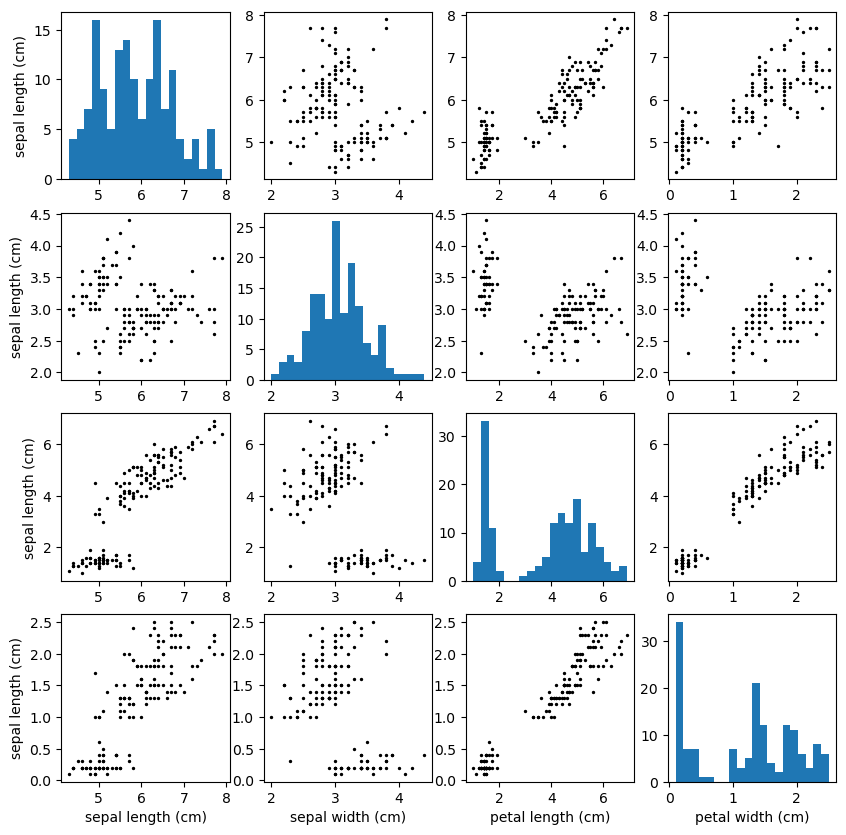

In [12]:
# Let's use matplotlib to make scatter plots of the data for all pairs of features
# Here we will make a grid of 4 rows and 4 columns of plots showing all pairs of features
# Note that the diagonal plots are histograms of each feature

# First, we will set the size of the figure
plt.figure(figsize=(10,10))

# Now, we will use two for loops to loop over all pairs of features 
for i in range(4):
    for j in range(4):
        # Now we select the subplot we want to modify
        plt.subplot(4, 4, i*4+j+1)
        
        if i == j:
            # For the diagonals, we will plot a histogram of the data
            plt.hist(irisData[:,i], bins=20)
        else:
            # For the off-diagonals, we will plot a scatter plot of the data
            plt.scatter(irisData[:,j], irisData[:,i], c='black', s=2)
        
        if i==3:
            # For the bottom row, we will label the x-axis
            plt.xlabel(iris.feature_names[j])
        if j==0:    
            # For the left column, we will label the y-axis
            plt.ylabel(iris.feature_names[j])

## Now, let's see how data varies according to the species

If our goal is to explore the differences between the four iris species, we should separate these out from the data.

In [13]:
# In machine learning, our goal is often to use the "features" to predict some "target" variable
# In this case, the features are the measurements of the flowers, and the target is the species of the flower.
# Let's look at the target variable:
irisTarget = iris.target

print(f'The type of irisTarget is {type(irisTarget)}')

# Now let's print the different methods and data that are contained in the irisTarget variable
print(f'The irisTarget variable contains the following methods or data: {dir(irisTarget)}')

# Let's look at the shape of the data
print(f'The shape of the iris target is: {irisTarget.shape}')

# Let's look at the first 5 rows of data
print(f'The first 5 rows of iris target are: {irisTarget[:5]}')

# Lets look at the unique values of the target
print(f'The unique values of the target are: {np.unique(irisTarget)}')

# Let's look at the unique names of the target that correspond to these values
print(f'The unique names of the target are: {iris.target_names}')


The type of irisTarget is <class 'numpy.ndarray'>
The irisTarget variable contains the following methods or data: ['T', '__abs__', '__add__', '__and__', '__array__', '__array_finalize__', '__array_function__', '__array_interface__', '__array_prepare__', '__array_priority__', '__array_struct__', '__array_ufunc__', '__array_wrap__', '__bool__', '__class__', '__class_getitem__', '__complex__', '__contains__', '__copy__', '__deepcopy__', '__delattr__', '__delitem__', '__dir__', '__divmod__', '__dlpack__', '__dlpack_device__', '__doc__', '__eq__', '__float__', '__floordiv__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__iadd__', '__iand__', '__ifloordiv__', '__ilshift__', '__imatmul__', '__imod__', '__imul__', '__index__', '__init__', '__init_subclass__', '__int__', '__invert__', '__ior__', '__ipow__', '__irshift__', '__isub__', '__iter__', '__itruediv__', '__ixor__', '__le__', '__len__', '__lshift__', '__lt__', '__matmul__', '__mod__', '__mul__', '__n

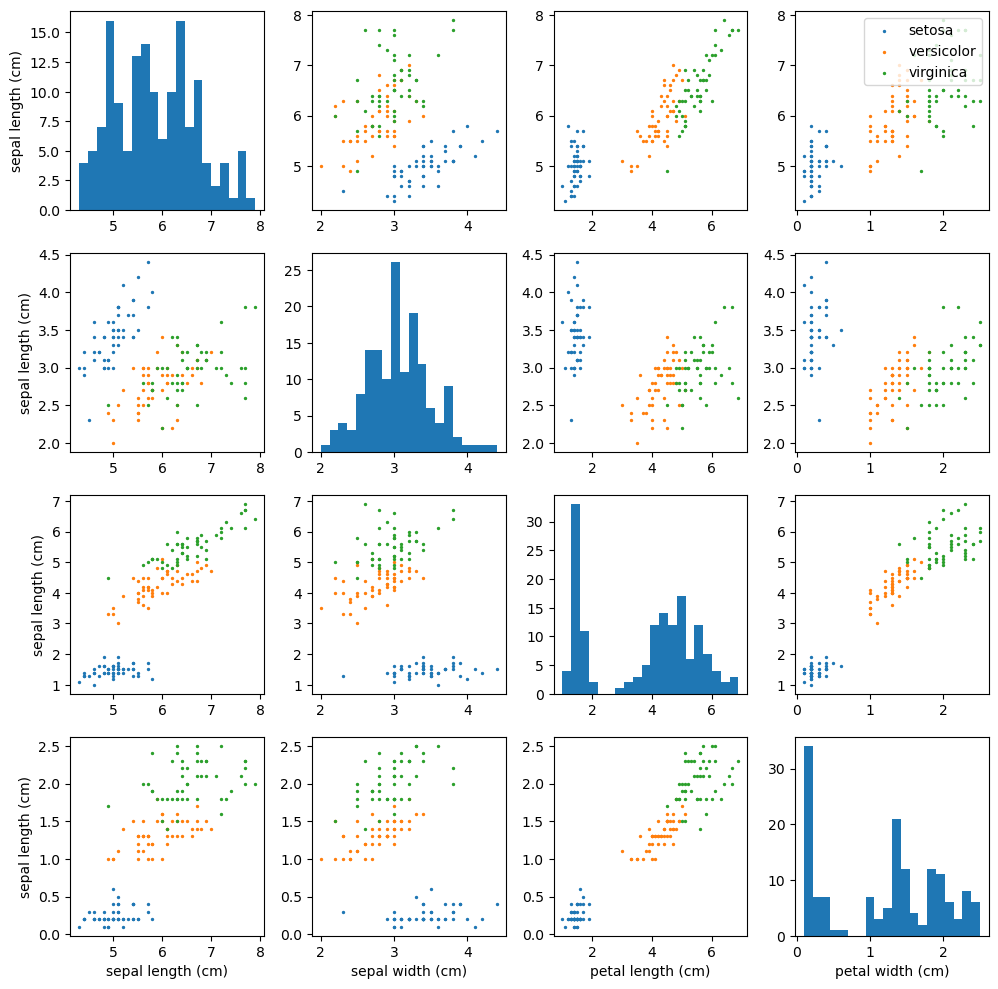

In [14]:
# Now, lets revisit the scatter plots, but this time color the points by the target

# this time, let's put the figure generation in a function definition so that we can reuse it later
def plotIrisData(irisData, irisTarget):

    # First, we will set the size of the figure
    plt.figure(figsize=(10,10))

    # Now, we will use two for loops to loop over all pairs of features
    for i in range(4):
        for j in range(4):
            # Now we select the subplot we want to modify
            plt.subplot(4, 4, i*4+j+1)
        
            if i == j:
                # For the diagonals, we will plot a histogram of the data
                plt.hist(irisData[:,i], bins=20)
            else:
                # For the off-diagonals, we will plot a scatter plot of the data
                # THESE ARE THE ONLY LINEs THAT CHANGED FROM ABOVE
                for iFlower in range(3):
                    plt.scatter(irisData[irisTarget==iFlower,j], irisData[irisTarget==iFlower,i], s=2)

            if i==3:
                # For the bottom row, we will label the x-axis
                plt.xlabel(iris.feature_names[j])
            if j==0:    
                # For the left column, we will label the y-axis
                plt.ylabel(iris.feature_names[j])

    # Let's add a legend to the top right of the figure
    # first, we will get the current axes corresponding to the top right plot
    ax = plt.subplot(4,4,4)
    # then we will add a legend to that plot
    plt.legend(iris.target_names, loc='upper right')

    # Finally, we will add some space between the plots so that the labels don't overlap
    plt.tight_layout()

# Now, let's call the function we just defined
plotIrisData(irisData, irisTarget)

## Singular Value Decomposition and Principal Component Analysis


### Normalizing the data

The process of normalization is to transform the data so that it has a mean of zero and a variance of one. 

To achieve this, we subtract the mean for each feature and divide by the standard deviation:

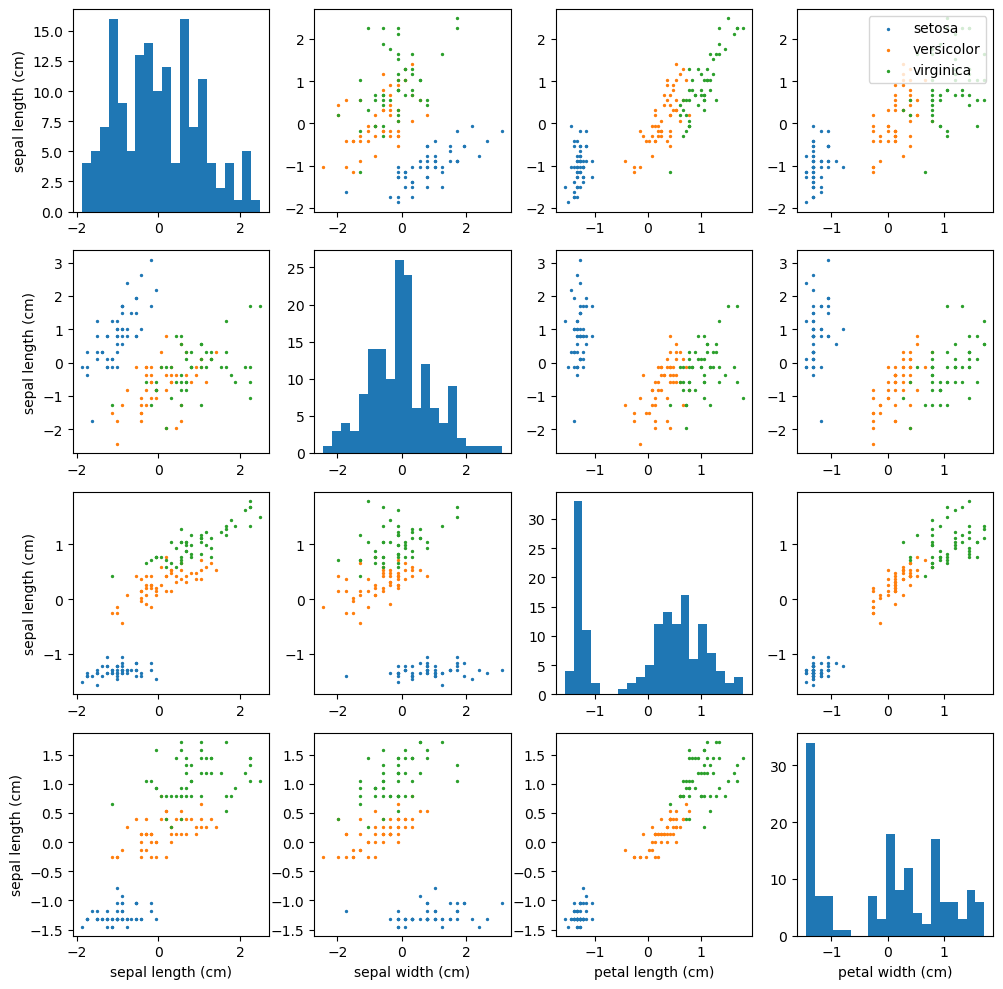

In [15]:
# Using the means and variances for our data, let's normalize it:
# First, we will subtract the mean from each column
irisDataNorm = irisData - meanIris
# Next, we will divide each column (axis = 0) by the standard deviation
irisDataNorm = irisDataNorm / np.std(irisDataNorm, axis=0)

# Let's plot the normalized data using the same code as above:
plotIrisData(irisDataNorm, irisTarget)


### Computing the Singular Value Decomposition
Now that we have normalized data, we can apply SVD to compute the principle components.

In [16]:
# Compute the SVD of the normalized data
U, S, V = np.linalg.svd(irisDataNorm, full_matrices=False)
# Here we use the full_matrices=False option to tell the function to only return the first 4 columns of U and the first 4 rows of V (the first 4 singular values)

# Let's look at the shape of the matrices
print(f'The shape of irisDataNorm is: {irisDataNorm.shape}')
print(f'The shape of U is: {U.shape}')
print(f'The shape of S is: {S.shape}')
print(f'The shape of V is: {V.shape}')

The shape of irisDataNorm is: (150, 4)
The shape of U is: (150, 4)
The shape of S is: (4,)
The shape of V is: (4, 4)


In [17]:
# Now, let's look at the singular values
print(f'The singular values are: {S}')

# Let's also see how much of the variance is explained by each singular value
varExplained = S**2 / np.sum(S**2)
print(f'The variance explained by each singular value is: {varExplained}')

print(f'The variance explained by the first two singular values is: {np.sum(varExplained[:2])}')

The singular values are: [20.92306556 11.7091661   4.69185798  1.76273239]
The variance explained by each singular value is: [0.72962445 0.22850762 0.03668922 0.00517871]
The variance explained by the first two singular values is: 0.9581320720000164


## Geometric Interpretation of the right Singular Vector, V

In [18]:
# Let's look at the first two rows of V, which correspond to the first two principal components
print(f'The first rows of V are: {V[:2,:]}')

The first rows of V are: [[ 0.52106591 -0.26934744  0.5804131   0.56485654]
 [-0.37741762 -0.92329566 -0.02449161 -0.06694199]]


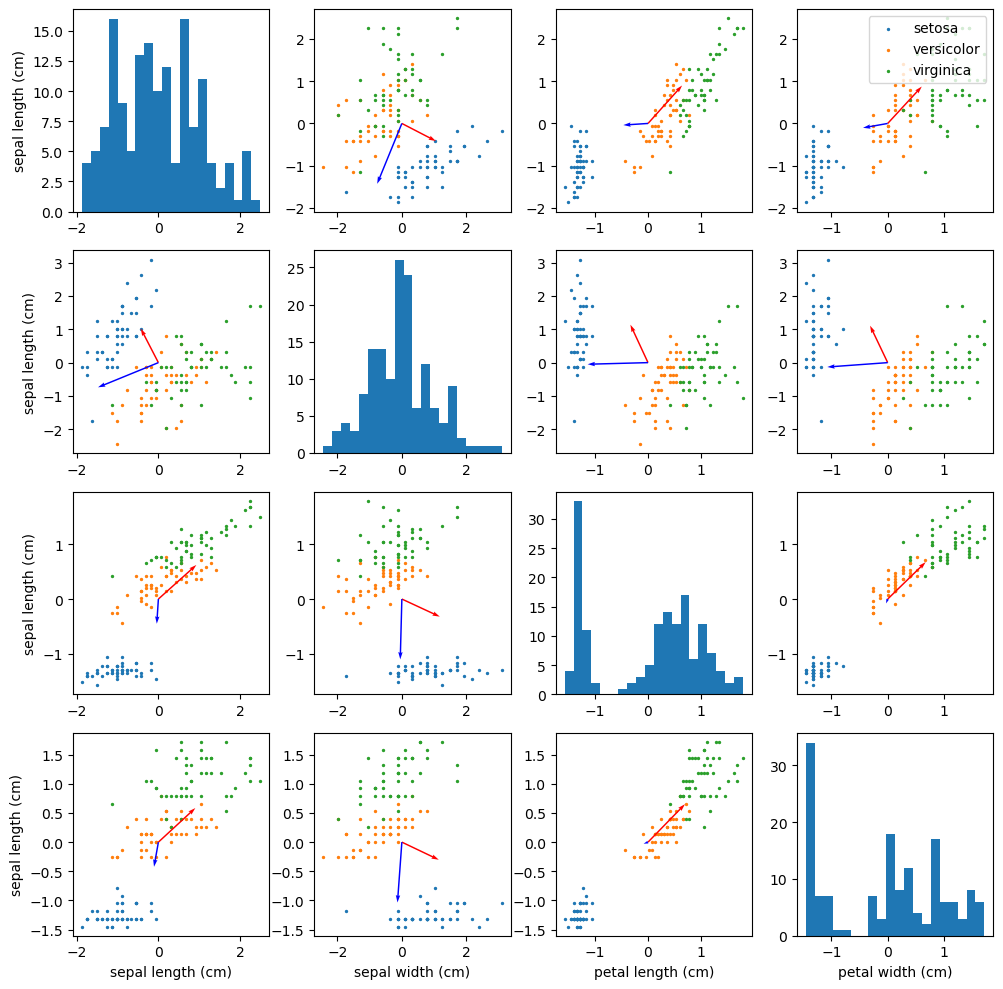

In [19]:
# But what do the numbers in V actually mean? 

# Let's replot our original data.
plotIrisData(irisDataNorm, irisTarget)

# Now let's add vectors corresponding to the first two ROWS of V to this plot.

# First, we will get the current axes corresponding to the top right plot
for i in range(4):
    for j in range(4):
        if i!=j:
            ax = plt.subplot(4,4,i*4+j+1)
            plt.quiver(np.zeros(2), np.zeros(2), V[:2,i], V[:2,j], color=['r','b'], scale=3)        

# This image now shows the directions of the first two principal components in the original data space.


In [20]:
# The matrix V allows us to transform our data into the principal component space.
# Let's compute the principal component space representation of our data, using the first two principal components
irisDataPC = irisDataNorm @ V[:2,:].T

# Let's look at the shape of the data
print(f'The shape of the iris data is: {irisData.shape}')
print(f'The shape of the iris data in PC space is: {irisDataPC.shape}')


The shape of the iris data is: (150, 4)
The shape of the iris data in PC space is: (150, 2)


Text(0, 0.5, 'Principle Component 2 ')

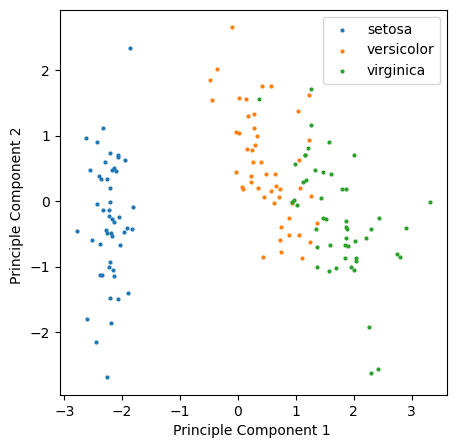

In [21]:
# Now let's plot the data in PC space
plt.figure(figsize=(5,5))
for i in range(3):
    plt.scatter(irisDataPC[irisTarget==i,0], irisDataPC[irisTarget==i,1], s=4)

plt.legend(iris.target_names, loc='upper right')
plt.xlabel('Principle Component 1 ')
plt.ylabel('Principle Component 2 ')


### Relationship between covariance matrix and singular value decomposition


In [ ]:
# For our nurmalized data (zero mean and unit variance for all columns), D, we computed the SVD:
#      D = U @ S @ V.T
# We also computed the covariance matrix:
#     C = D.T @ D / (N-1)   (where N is the number of samples)
# We can show that the covariance matrix is related to the SVD by:
#     C = (V @ S @ U^T) @ ( U @ S @ V^T ) / (N-1) = (V @ S**2 @ V.T) / (N-1)
# Because C is positive definite, we can also diagonalize it using the eigendecomposition:
#     C = E * L * E.T
# where E is the matrix of eigenvectors, and L is the diagonal matrix of the eigenvalues of C
# We can show that the eigenvectors of C are related to the SVD by:
#     E = V
# and the eigenvalues of C are related to the SVD by:
#     L = S**2 / (N-1)

# Let's check this for our data:

# First, let's compute the covariance matrix of our normalized data
covNormIris = irisDataNorm.T @ irisDataNorm / irisDataNorm.shape[0]
# Next, let's print the eigenvalues and eigenvectors of the covariance matrix
print(f'The eigenvalues of the  iris covariance matrix are {np.linalg.eig(covNormIris)[0]}')
print(f'The eigenvalues vectors of the  iris covariance matrix are {np.linalg.eig(covNormIris)[1]}')

# Now, let's print the singular values and vectors of the normalized data
print(f'The S^2/N for our SVD analysis of the data are {S**2/irisDataNorm.shape[0]}')
print(f'The values of V are {V}')


In [ ]:
# Now lets vidualize how the SVD reduction looks in the original space
# First, we will plot the original data.
plotIrisData(irisDataNorm, irisTarget)

components = [0]
# Now lets compute the estimate of this data using the first two principal components
irisDataRed = U[:,components] @ np.diag(S[components]) @ V[components,:]

# now lets add the estimate to the plot and use lines to connect the points.
# with the color of the lines matching the color of the points
# between the original data and the estimate
for i in range(4):
    for j in range(4):
        if i==j:
            # add the histogram for the reduced data
            ax = plt.subplot(4,4,i*4+j+1)
            plt.hist(irisDataRed[:,i], bins=20)
        else:
            ax = plt.subplot(4,4,i*4+j+1)
            for iFlower in range(3):
                # plot the reduced data using x's
                plt.scatter(irisDataRed[irisTarget==iFlower,j], irisDataRed[irisTarget==iFlower,i], s=4, marker='x')
                # plot the original data using circles
                plt.scatter(irisDataNorm[irisTarget==iFlower,j], irisDataNorm[irisTarget==iFlower,i], s=4)
                # plot lines connecting the original and reduced data
                plt.plot([irisDataNorm[irisTarget==iFlower,j], irisDataRed[irisTarget==iFlower,j]], \
                        [irisDataNorm[irisTarget==iFlower,i], irisDataRed[irisTarget==iFlower,i]], alpha=0.1)



# Example 2 - Using Singular Value Decomposition to Compress an Image

In this example, you will use the Singular Value Decomposition to compress and compare several images. 

You will start by loading am image and converting it to a numpy array.

Next, you will apply the SVD to the image and then reconstruct the image using only the first k singular values.

Finally, you will compare the original image to the compressed image to see how well the compression worked for different values of k.

In [ ]:
# Write your code here.  Start by writing out your plan in comments, then use CoPilot to 
# help you to write the code.  Be sure to break the problem down into smaller steps, and
# to test each step as you go.  Feel free to create new cells as needed.

# Example 3 - Using Singular Value Decomposition to Compress Multiple Images at Once

In this example, you will use the Singular Value Decomposition to compress and compare several images at once.

You will start by loading several images and converting them to numpy arrays.

